In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv('List of Countries by Sugarcane Production.csv')

In [3]:
df.head()

,Unnamed: 0,Country,Continent,Production (Tons),Production per Person (Kg),Acreage (Hectare),Yield (Kg / Hectare)
0,0,Brazil,South America,768.678.382,"3.668,531",10.226.205,"75.167,5"
1,1,India,Asia,348.448.000,260721,4.950.000,"70.393,5"
2,2,China,Asia,123.059.739,88287,1.675.215,"73.459,1"
3,3,Thailand,Asia,87.468.496,"1.264,303",1.336.575,"65.442,2"
4,4,Pakistan,Asia,65.450.704,324219,1.130.820,57.879


In [4]:
df.shape

(103, 7)

# Cleaning

In [5]:
df = df.drop('Unnamed: 0', axis=1)

In [6]:
df["Production (Tons)"] = df["Production (Tons)"].str.replace(".","")
df["Production per Person (Kg)"] = df["Production per Person (Kg)"].str.replace(".","").str.replace(",",".")
df["Acreage (Hectare)"] = df["Acreage (Hectare)"].str.replace(".","")
df["Yield (Kg / Hectare)"]= df["Yield (Kg / Hectare)"].str.replace(".","").str.replace(",",".")

In [7]:
df.head()

,Country,Continent,Production (Tons),Production per Person (Kg),Acreage (Hectare),Yield (Kg / Hectare)
0,Brazil,South America,768678382,3668.531,10226205,75167.5
1,India,Asia,348448000,260721,4950000,70393.5
2,China,Asia,123059739,88287,1675215,73459.1
3,Thailand,Asia,87468496,1264.303,1336575,65442.2
4,Pakistan,Asia,65450704,324219,1130820,57879


In [8]:
df.rename(columns={"Production (Tons)": "Production(Tons)"}, inplace = True)
df.rename(columns={"Production per Person (Kg)": "Production_per_person(Kg)"}, inplace = True)
df.rename(columns={"Acreage (Hectare)": "Acreage(Hectare)"}, inplace = True)
df.rename(columns={"Yield (Kg / Hectare)": "Yield(Kg/Hectare)"}, inplace = True)

In [9]:
df.head()

,Country,Continent,Production(Tons),Production_per_person(Kg),Acreage(Hectare),Yield(Kg/Hectare)
0,Brazil,South America,768678382,3668.531,10226205,75167.5
1,India,Asia,348448000,260721,4950000,70393.5
2,China,Asia,123059739,88287,1675215,73459.1
3,Thailand,Asia,87468496,1264.303,1336575,65442.2
4,Pakistan,Asia,65450704,324219,1130820,57879


In [10]:
df.isnull().sum()

Country                      0
Continent                    0
Production(Tons)             0
Production_per_person(Kg)    0
Acreage(Hectare)             1
Yield(Kg/Hectare)            1
dtype: int64

In [11]:
df = df.dropna().reset_index().drop('index', axis=1)

In [12]:
df

,Country,Continent,Production(Tons),Production_per_person(Kg),Acreage(Hectare),Yield(Kg/Hectare)
0,Brazil,South America,768678382,3668.531,10226205,75167.5
1,India,Asia,348448000,260721,4950000,70393.5
2,China,Asia,123059739,88287,1675215,73459.1
3,Thailand,Asia,87468496,1264.303,1336575,65442.2
4,Pakistan,Asia,65450704,324219,1130820,57879
...,...,...,...,...,...,...
97,Spain,Europe,394,8,9,43596.5
98,Lebanon,Asia,97,16,3,28386.4
99,Singapore,Asia,50,9,2,25
100,Samoa,Oceania,12,6,1,11949.8


In [13]:
df.dtypes

Country                      object
Continent                    object
Production(Tons)             object
Production_per_person(Kg)    object
Acreage(Hectare)             object
Yield(Kg/Hectare)            object
dtype: object

In [14]:
df["Production(Tons)"] = df["Production(Tons)"].astype(float)
df["Production_per_person(Kg)"] = df["Production_per_person(Kg)"].astype(float)
df["Acreage(Hectare)"] = df["Acreage(Hectare)"].astype(float)
df["Yield(Kg/Hectare)"] = df["Yield(Kg/Hectare)"].astype(float)

## Data after cleaning

In [15]:
df.nunique()

Country                      102
Continent                      6
Production(Tons)             102
Production_per_person(Kg)    101
Acreage(Hectare)             101
Yield(Kg/Hectare)            102
dtype: int64

In [16]:
df.dtypes

Country                       object
Continent                     object
Production(Tons)             float64
Production_per_person(Kg)    float64
Acreage(Hectare)             float64
Yield(Kg/Hectare)            float64
dtype: object

# Univariate Analysis

In [17]:
df.head()

,Country,Continent,Production(Tons),Production_per_person(Kg),Acreage(Hectare),Yield(Kg/Hectare)
0,Brazil,South America,768678382.0,3668.531,10226205.0,75167.5
1,India,Asia,348448000.0,260721.000,4950000.0,70393.5
2,China,Asia,123059739.0,88287.000,1675215.0,73459.1
3,Thailand,Asia,87468496.0,1264.303,1336575.0,65442.2
4,Pakistan,Asia,65450704.0,324219.000,1130820.0,57879.0


## How many countries produce sugarcane from each continent?

<Axes: xlabel='Continent'>

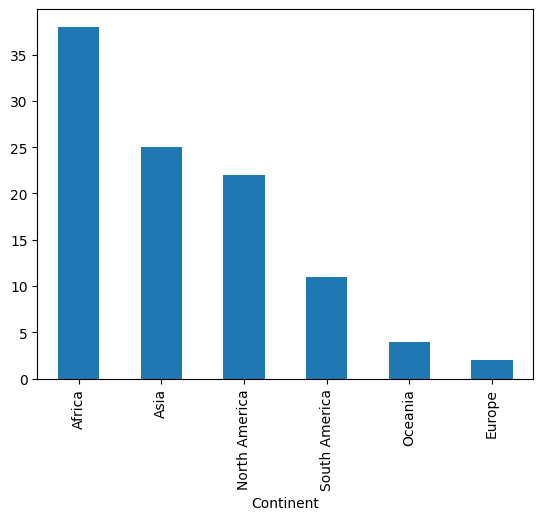

In [18]:
df['Continent'].value_counts().plot(kind='bar')

## Checking outliers

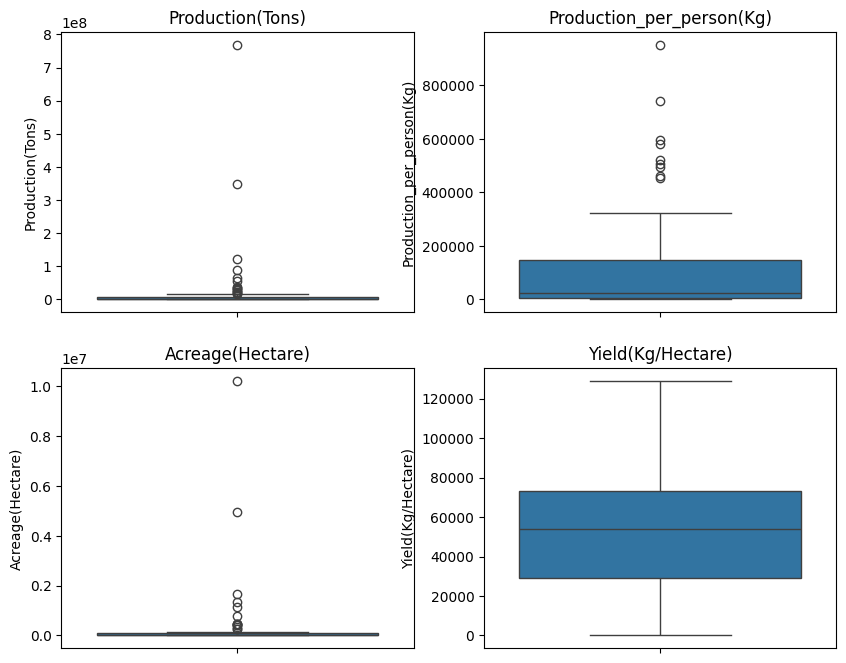

In [19]:
plt.figure(figsize = (10,8))

plt.subplot(2,2,1)
sns.boxplot(df["Production(Tons)"])
plt.title("Production(Tons)")

plt.subplot(2,2,2)
sns.boxplot(df["Production_per_person(Kg)"])
plt.title("Production_per_person(Kg)")

plt.subplot(2,2,3)
sns.boxplot(df["Acreage(Hectare)"])
plt.title("Acreage(Hectare)")

plt.subplot(2,2,4)
sns.boxplot(df["Yield(Kg/Hectare)"])
plt.title("Yield(Kg/Hectare)")

plt.show()

Outliers are required here, as it shows production info

# Distribution of the columns

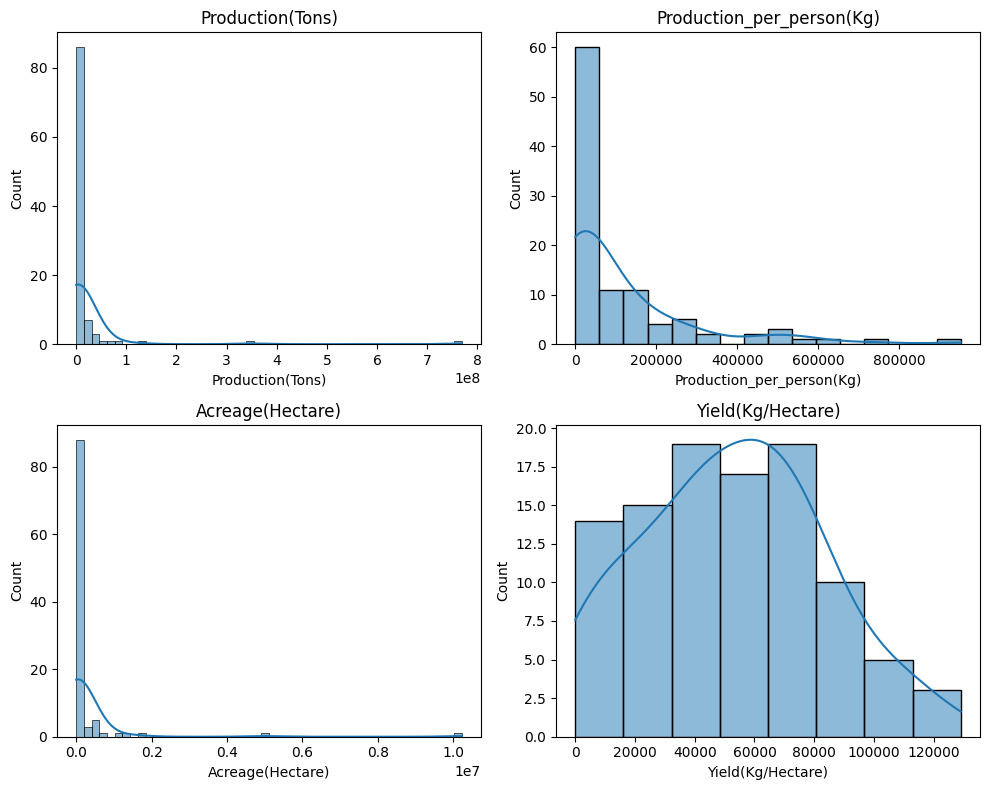

In [20]:
plt.figure(figsize=(10, 8))

plt.subplot(2, 2, 1)
sns.histplot(df['Production(Tons)'], kde=True, bins=50)
plt.title("Production(Tons)")

plt.subplot(2, 2, 2)
sns.histplot(df['Production_per_person(Kg)'], kde=True)
plt.title("Production_per_person(Kg)")

plt.subplot(2, 2, 3)
sns.histplot(df['Acreage(Hectare)'], kde=True, bins=50)
plt.title("Acreage(Hectare)")

plt.subplot(2, 2, 4)
sns.histplot(df['Yield(Kg/Hectare)'], kde=True)
plt.title("Yield(Kg/Hectare)")

plt.tight_layout()
plt.show()

# Bivariate Analysis

In [21]:
df.head()

,Country,Continent,Production(Tons),Production_per_person(Kg),Acreage(Hectare),Yield(Kg/Hectare)
0,Brazil,South America,768678382.0,3668.531,10226205.0,75167.5
1,India,Asia,348448000.0,260721.000,4950000.0,70393.5
2,China,Asia,123059739.0,88287.000,1675215.0,73459.1
3,Thailand,Asia,87468496.0,1264.303,1336575.0,65442.2
4,Pakistan,Asia,65450704.0,324219.000,1130820.0,57879.0


## Which country produces maximum sugarcane?

In [22]:
df_new = df[['Country', 'Production(Tons)']].set_index('Country')
df_new

,Production(Tons)
Country,
Brazil,768678382.0
India,348448000.0
China,123059739.0
Thailand,87468496.0
Pakistan,65450704.0
...,...
Spain,394.0
Lebanon,97.0
Singapore,50.0


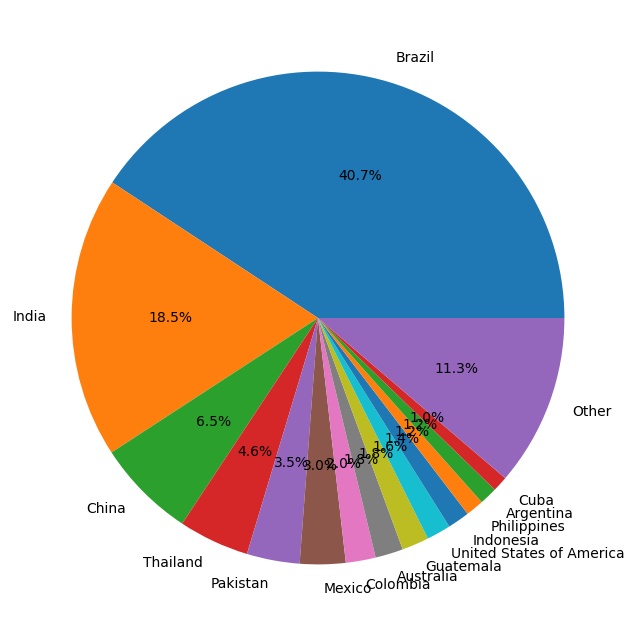

In [23]:
df_new["Production(Tons)_percent"] = df_new["Production(Tons)"] / df_new["Production(Tons)"].sum() * 100
perc_rest = df_new[df_new["Production(Tons)_percent"] < 1.0]["Production(Tons)_percent"].sum()
prod_rest = df_new[df_new["Production(Tons)_percent"] < 1.0]["Production(Tons)"].sum()
rest = pd.DataFrame([(prod_rest, perc_rest)], index=['Other'], columns=df_new.columns)

df_pie = df_new[df_new["Production(Tons)_percent"] >= 1.0]
df_pie = pd.concat([df_pie, rest])

plt.figure(figsize=(8, 8))
plt.pie(df_pie['Production(Tons)'], labels=df_pie.index, autopct='%.1f%%')
plt.show()

In [27]:
df_new.drop("Production(Tons)_percent", axis=1, inplace=True)

<Axes: xlabel='Country'>

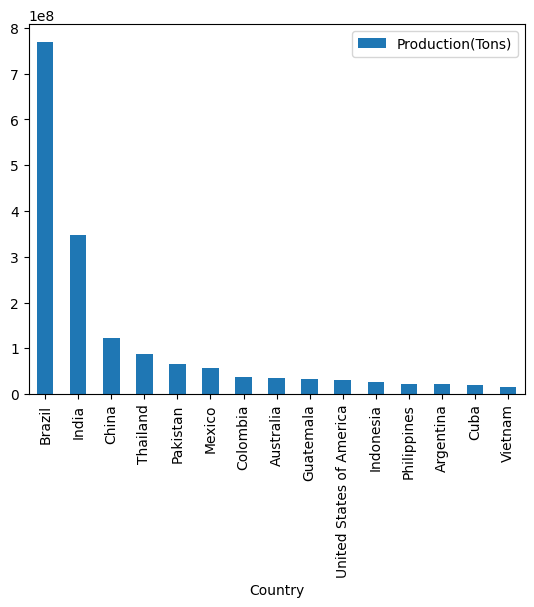

In [28]:
df_new.sort_values("Production(Tons)", ascending = False).head(15).plot(kind="bar")

## Which country has the largest acreage?

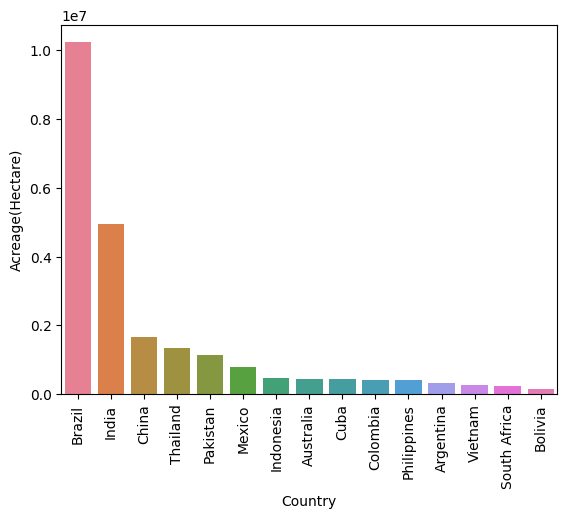

In [43]:
df_acr = df.sort_values("Acreage(Hectare)", ascending=False).head(15)
ax = sns.barplot(data=df_acr, x="Country", y="Acreage(Hectare)", hue="Country")
plt.xticks(rotation=90)
plt.show()

## Which country has highest yield per hectare?

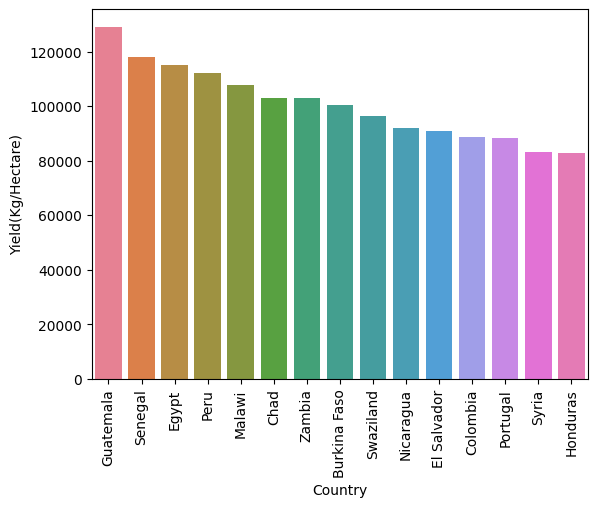

In [46]:
df_yield = df.sort_values("Yield(Kg/Hectare)", ascending=False).head(15)
ax = sns.barplot(data=df_yield, x="Country", y="Yield(Kg/Hectare)", hue="Country")
plt.xticks(rotation=90)
plt.show()

## Which country has highest production?


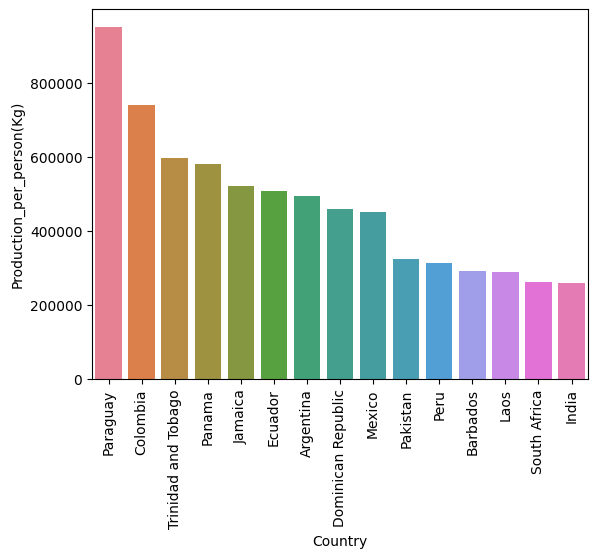

In [47]:
df_yield = df.sort_values("Production_per_person(Kg)", ascending=False).head(15)
ax = sns.barplot(data=df_yield, x="Country", y="Production_per_person(Kg)", hue="Country")
plt.xticks(rotation=90)
plt.show()

# Correlation

In [52]:
corr = df.corr(numeric_only=True)
corr

,Production(Tons),Production_per_person(Kg),Acreage(Hectare),Yield(Kg/Hectare)
Production(Tons),1.000000,0.015000,0.997550,0.132812
Production_per_person(Kg),0.015000,1.000000,0.012557,0.017999
Acreage(Hectare),0.997550,0.012557,1.000000,0.113433
Yield(Kg/Hectare),0.132812,0.017999,0.113433,1.000000


<Axes: >

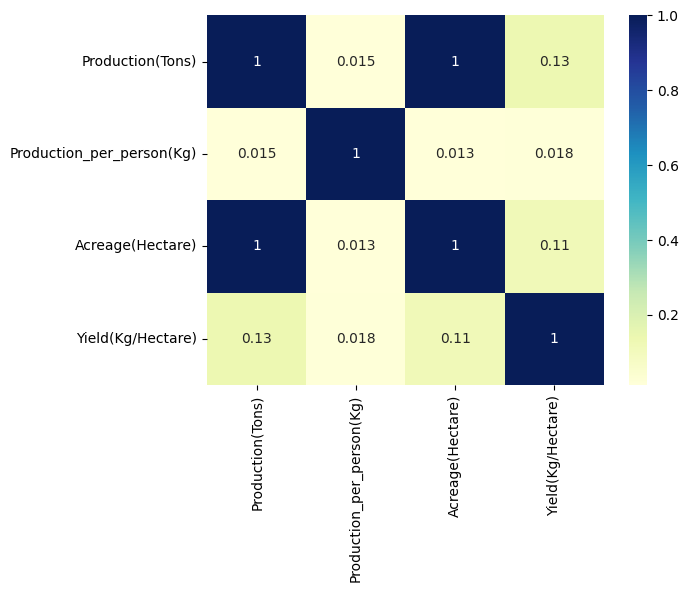

In [58]:
sns.heatmap(data=corr, annot=True, cmap='YlGnBu')

## Do countries with larger acreage produce more sugarcane?


<Axes: xlabel='Acreage(Hectare)', ylabel='Production(Tons)'>

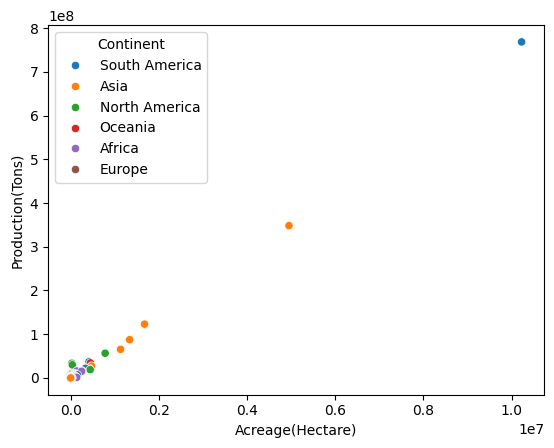

In [59]:
sns.scatterplot(data=df, x='Acreage(Hectare)', y='Production(Tons)', hue='Continent')

## Do countries which yield more sugarcane per hectare produces more sugarcane in total?

<Axes: xlabel='Yield(Kg/Hectare)', ylabel='Production(Tons)'>

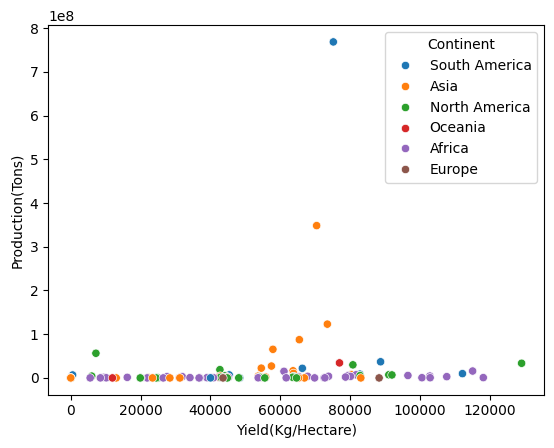

In [60]:
sns.scatterplot(data=df, x='Yield(Kg/Hectare)', y='Production(Tons)', hue='Continent')

# Analysis for Continent

In [61]:
df.head()

,Country,Continent,Production(Tons),Production_per_person(Kg),Acreage(Hectare),Yield(Kg/Hectare)
0,Brazil,South America,768678382.0,3668.531,10226205.0,75167.5
1,India,Asia,348448000.0,260721.000,4950000.0,70393.5
2,China,Asia,123059739.0,88287.000,1675215.0,73459.1
3,Thailand,Asia,87468496.0,1264.303,1336575.0,65442.2
4,Pakistan,Asia,65450704.0,324219.000,1130820.0,57879.0


In [70]:
df_continent = df.groupby('Continent').sum(numeric_only=True)
df_continent['Number_of_countries'] = df.groupby('Continent').count()['Country']
df_continent

,Production(Tons),Production_per_person(Kg),Acreage(Hectare),Yield(Kg/Hectare),Number_of_countries
Continent,,,,,
Africa,89681472.0,2332636.293,1439089.0,2142107.5,38
Asia,721930425.0,1857769.303,10608319.0,1171871.4,25
Europe,5823.0,536.000,71.0,131870.9,2
North America,173995947.0,3796081.508,1581983.0,1082602.4,22
Oceania,36177574.0,28593.605,490909.0,162419.1,4
South America,865588126.0,3505531.738,11369236.0,677192.7,11


## Which continent produces maximum sugarcane?


<Axes: xlabel='Continent'>

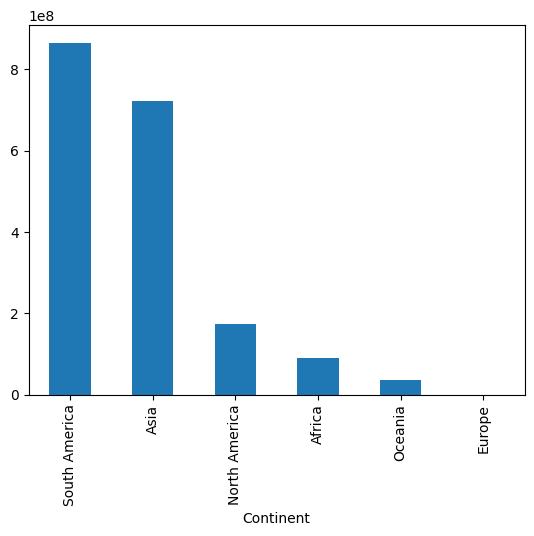

In [74]:
df_continent['Production(Tons)'].sort_values(ascending=False).plot(kind='bar')

## Do number of countries in a Continent effects production of sugarcane?


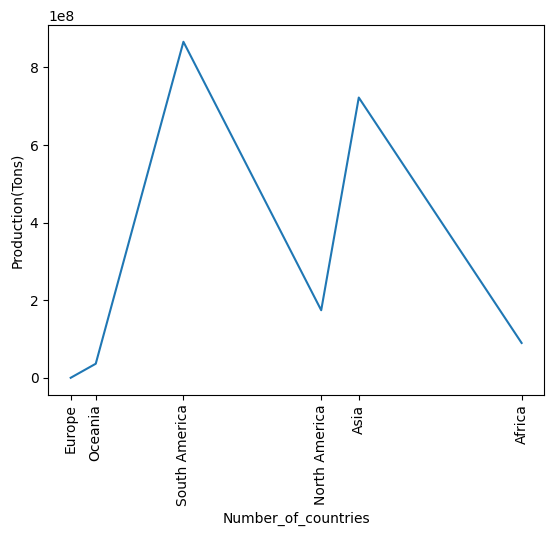

In [79]:
sns.lineplot(data=df_continent, x='Number_of_countries', y='Production(Tons)')
plt.xticks(df_continent['Number_of_countries'], df_continent.index.to_list(), rotation=90)
plt.show()

## Do continent with largest acreage produces more sugarcane?

<Axes: xlabel='Acreage(Hectare)', ylabel='Production(Tons)'>

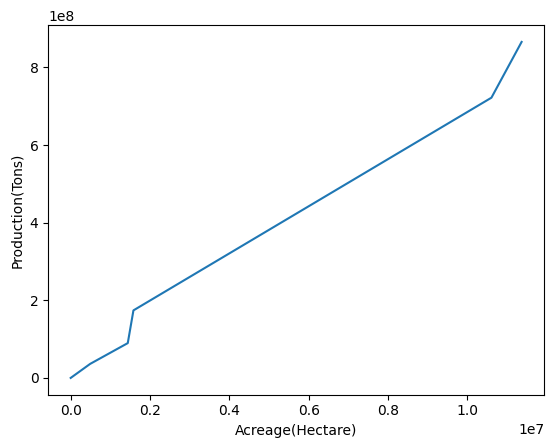

In [80]:
sns.lineplot(data=df_continent, x='Acreage(Hectare)', y='Production(Tons)')

## Production distribution by continent


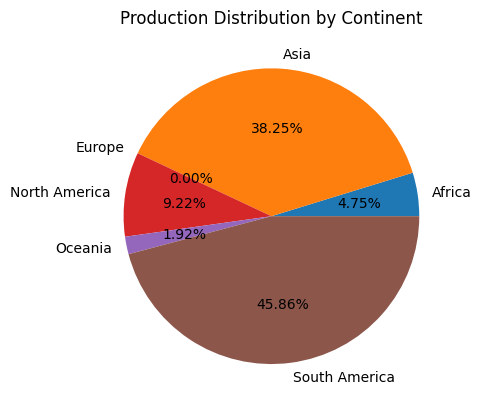

In [85]:
plt.pie(df_continent['Production(Tons)'], labels=df_continent.index, autopct='%.2f%%')
plt.title('Production Distribution by Continent')
plt.show()

## Correlation for continent

In [86]:
df_continent.corr()

,Production(Tons),Production_per_person(Kg),Acreage(Hectare),Yield(Kg/Hectare),Number_of_countries
Production(Tons),1.000000,0.522211,0.994897,0.091201,0.109244
Production_per_person(Kg),0.522211,1.000000,0.463215,0.542961,0.540086
Acreage(Hectare),0.994897,0.463215,1.000000,0.111166,0.132817
Yield(Kg/Hectare),0.091201,0.542961,0.111166,1.000000,0.989712
Number_of_countries,0.109244,0.540086,0.132817,0.989712,1.000000


<Axes: >

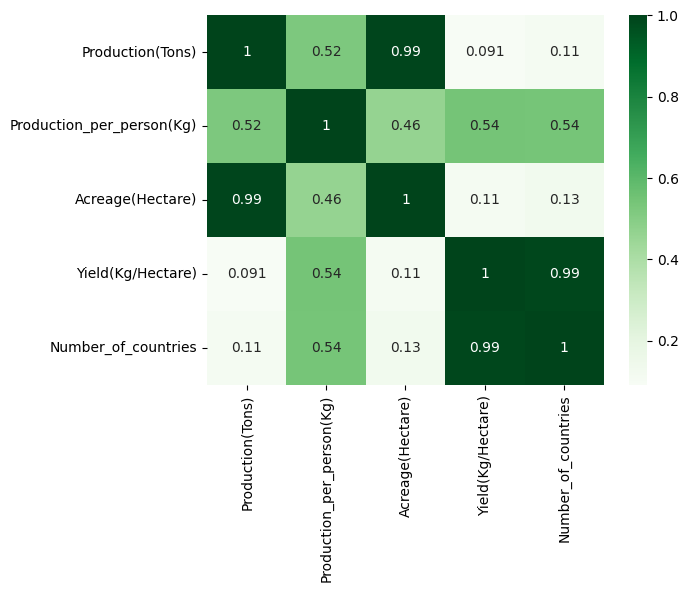

In [89]:
sns.heatmap(data=df_continent.corr(), annot=True, cmap='Greens')